<a href="https://colab.research.google.com/github/sankardevisharath/amex-default-prediction/blob/master/notebooks/final_model/GBDT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os import listdir

files = listdir('/content/drive/MyDrive/amex-default-prediction/data/raw/')

In [ ]:
import gc 

import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score


from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [ ]:
cat_cols = ['D_63', 'D_64','B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_66', 'D_68']
TRAIN_LABELS_PATH = '/content/train_labels.csv'

In [ ]:
!unzip /content/drive/MyDrive/amex-default-prediction/data/amex-default-prediction.zip \
 train_labels.csv

Archive:  /content/drive/MyDrive/amex-default-prediction/data/amex-default-prediction.zip
  inflating: train_labels.csv        


In [ ]:
train_labels = pd.read_csv(TRAIN_LABELS_PATH)

In [ ]:
def append_label(source_df):
  return pd.merge(left=source_df, right=train_labels, how='inner')

In [ ]:
flag = True
X = pd.DataFrame()
Y = pd.DataFrame()

for f in files:
  print(f)
  df_tmp = pd.read_parquet('/content/drive/MyDrive/amex-default-prediction/data/raw/' + f)
  df_tmp = append_label(df_tmp)


  if(flag):
     enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
     df_tmp[['D_63', 'D_64']]=enc.fit(df_tmp[['D_63', 'D_64']])
     flag = False

  df_tmp[['D_63', 'D_64']]=enc.transform(df_tmp[['D_63', 'D_64']])
  df_tmp.fillna(0, inplace=True)

  X= X.append(df_tmp.loc[:, ~df_tmp.columns.isin(['customer_ID', 'S_2', 'target'])])

  Y = Y.append(df_tmp.loc[:, df_tmp.columns == 'target'])

  
  del df_tmp
  gc.collect()


data_2017-04.parquet
data_2017-05.parquet
data_2017-06.parquet
data_2017-03.parquet
data_2017-07.parquet
data_2017-08.parquet
data_2017-09.parquet
data_2017-10.parquet
data_2017-11.parquet
data_2017-12.parquet
data_2018-01.parquet
data_2018-02.parquet
data_2018-03.parquet


In [ ]:
gc.collect()

22

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
gc.collect()

44

In [ ]:
del X, Y

In [ ]:
gc.collect()

44

In [ ]:
clf = GradientBoostingClassifier(subsample=0.05, verbose=1,n_iter_no_change=3, validation_fraction=0.1)

In [ ]:
clf.fit(X_train, y_train.values.ravel())

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.0419           0.0787           40.53m
         2           0.9814           0.0621           39.98m
         3           0.9302           0.0503           39.50m
         4           0.8934           0.0412           39.14m
         5           0.8564           0.0352           38.80m
         6           0.8260           0.0297           38.40m
         7           0.8017           0.0259           38.00m
         8           0.7773           0.0223           37.57m
         9           0.7601           0.0189           37.12m
        10           0.7424           0.0167           36.69m
        20           0.6479           0.0052           32.51m
        30           0.6129           0.0030           28.97m
        40           0.5914           0.0012           25.07m
        50           0.5859           0.0009           21.03m
        60           0.5743           0.0007           16.90m
       

GradientBoostingClassifier(n_iter_no_change=3, subsample=0.05, verbose=1)

In [ ]:
clf.score(X_test, y_test)

0.8725028044158364

In [ ]:
clf.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': 3,
 'random_state': None,
 'subsample': 0.05,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 1,
 'warm_start': False}

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [ ]:
tn, fp, fn, tp

(761067, 69797, 71252, 204175)

In [ ]:
f1_score(y_test, y_pred)

0.7432667332849168

In [ ]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9144    0.9160    0.9152    830864
           1     0.7452    0.7413    0.7433    275427

    accuracy                         0.8725   1106291
   macro avg     0.8298    0.8286    0.8292   1106291
weighted avg     0.8723    0.8725    0.8724   1106291



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


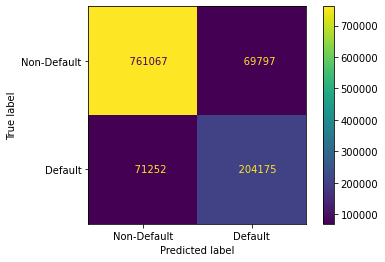

In [ ]:
plot_confusion_matrix(clf, X_test, y_test,display_labels=['Non-Default', 'Default'], values_format='10d')  
plt.show()